# Valentine's Day Spending Analysis

The National Retail Federation in the United States has been conducting surveys on how people plan to celebrate Valentine's Day for over a decade. We'll use their survey data for our analysis, which  you can download from Kaggle, and is free to use under the Creative Commons Public Domain license.

Some interesting questions we can ask on this dataset are:
1. Historical Spending Trends: How has the average spending per person on Valentine's Day changed over the last decade, and which gift categories have seen the most significant increase or decrease in spending?
2. Gender Differences in Gift Preferences: How do the spending patterns on different gift categories for Valentine's Day differ between men and women?
3. Age Group Preferences: What are the preferred gift categories for Valentine's Day among different age groups, and how does this preference change with age?

In [3]:
# Import relevant libraries

import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Load the datasets
historical_spending = pd.read_csv('data/historical_spending.csv')
gifts_gender = pd.read_csv('data/gifts_gender.csv')
gifts_age = pd.read_csv('data/gifts_age.csv')

In [5]:
historical_spending.head()

,Year,PercentCelebrating,PerPerson,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
0,2010,60,103.00,8.60,12.33,21.52,5.91,23.76,10.93,8.42
1,2011,58,116.21,10.75,12.62,26.18,8.09,24.86,12.00,11.21
2,2012,59,126.03,10.85,13.49,29.60,6.93,25.66,10.42,8.43
3,2013,60,130.97,11.64,13.48,30.94,8.32,27.93,11.46,10.23
4,2014,54,133.91,10.80,15.00,30.58,7.97,27.48,13.37,9.00


In [6]:
gifts_gender.head(5)


,Gender,SpendingCelebrating,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
0,Men,27,52,56,30,37,33,20,18
1,Women,27,59,19,14,43,29,24,24


In [7]:
gifts_age.head()

,Age,SpendingCelebrating,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
0,18-24,51,70,50,33,33,41,33,23
1,25-34,40,62,44,34,33,37,27,19
2,35-44,31,58,41,29,42,30,26,22
3,45-54,19,60,37,20,42,31,20,23
4,55-64,18,50,32,13,43,29,19,20


#### Q1: Historical Spending Trends: How has the average spending per person on Valentine's Day changed over the last decade, and which gift categories have seen the most significant increase or decrease in spending?

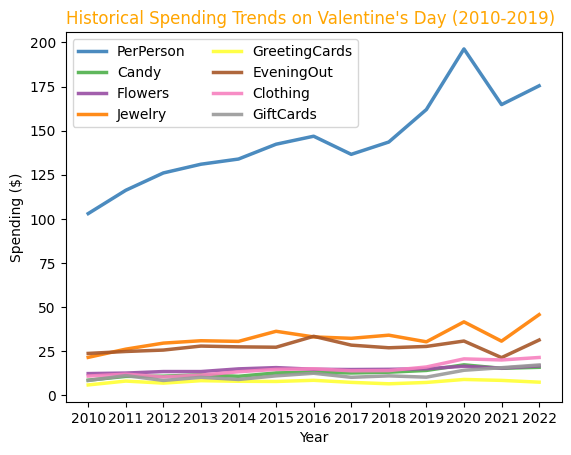

In [8]:
# Create a color palette
palette = plt.get_cmap('Set1')

# Plot each column
num = 0
for column in historical_spending.drop(['Year', 'PercentCelebrating'], axis=1):
    num += 1
    plt.plot(historical_spending['Year'], historical_spending[column], marker='', color=palette(num), linewidth=2.5, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)

# Add titles
plt.title("Historical Spending Trends on Valentine's Day (2010-2019)", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Year")
plt.ylabel("Spending ($)")
plt.xticks(historical_spending['Year'])

# Show the plot
plt.show()


#### Q2: Gender Differences in Gift Preferences: How do the spending patterns on different gift categories for Valentine's Day differ between men and women?

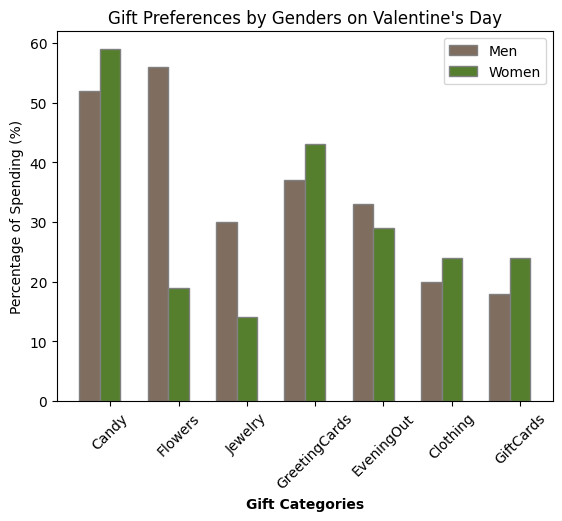

In [9]:
# Set the width of the bars
barWidth = 0.3

# Remove the 'SpendingCelebrating' column which is not a gift category
gifts_gender = gifts_gender.drop('SpendingCelebrating', axis=1)

# Set position of bar on X axis
r1 = range(len(gifts_gender.columns[1:]))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, gifts_gender.iloc[0, 1:], color='#7f6d5f', width=barWidth, edgecolor='grey', label='Men')
plt.bar(r2, gifts_gender.iloc[1, 1:], color='#557f2d', width=barWidth, edgecolor='grey', label='Women')

# Add xticks on the middle of the group bars
plt.xlabel('Gift Categories', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(gifts_gender.columns[1:]))], gifts_gender.columns[1:], rotation=45)
plt.ylabel('Percentage of Spending (%)')
plt.title('Gift Preferences by Genders on Valentine\'s Day')

# Create legend & Show graphic
plt.legend()
plt.show()

#### Q3: Age Group Preferences: What are the preferred gift categories for Valentine's Day among different age groups, and how does this preference change with age?

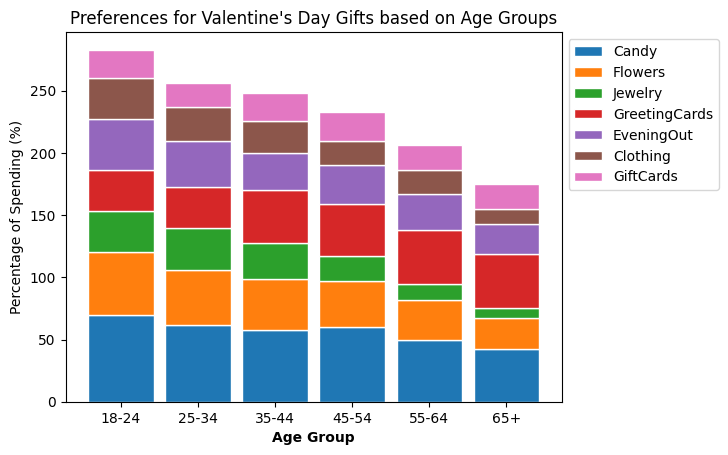

In [10]:
# Remove the 'SpendingCelebrating' column which is not a gift category
gifts_age = gifts_age.drop('SpendingCelebrating', axis=1)

# Set the width of the bars
barWidth = 0.85

# Set the position of the bars on the x-axis
r = range(len(gifts_age))

# Plot
for i, col in enumerate(gifts_age.columns[1:]):
    plt.bar(r, gifts_age[col], bottom=gifts_age[gifts_age.columns[1:i+1]].sum(axis=1), 
            edgecolor='white', width=barWidth, label=col)

# Add xticks on the middle of the group bars
plt.xlabel('Age Group', fontweight='bold')
plt.xticks(r, gifts_age['Age'])
plt.ylabel('Percentage of Spending (%)')
plt.title('Preferences for Valentine\'s Day Gifts based on Age Groups')

# Create legend & Show graphic
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()
